## Chapter 11. Time Series
<a id='index'></a>

* Timestamps, specific instants in time
* Fixed periods, such as the month January 2007 or the full year 2010
* Intervals of time, indicated by a start and end timestamp. Periods can be thought of as special cases of intervals
* Experiment or elapsed time; each timestamp is a measure of time relative to a particular start time (e.g., the diameter of a cookie baking each second since being placed in the oven)

***pandas provides many built-in time series tools and data algorithms.***

## Table of Content
- [11.1 Date and Time Data Types and Tools](#111)
    - [11.1.1 Converting Between String and Datetime](#1111)
- [11.2 Time Series Basics](#112)
    - [11.2.1 Indexing, Selection, Subsetting](#1121)
    - [11.2.2 Time Series with Duplicate Indices](#1122)
- [11.3 Date Ranges, Frequencies, and Shifting](#113)
    - [11.3.1 Generating Date Ranges](#1131)
    - [11.3.2 Frequencies and Date Offsets](#1132)
        - [11.3.2.1 Week of month dates](#11321)
    - [11.3.3 Shifting (Leading and Lagging) Data](#1133)
        - [11.3.3.1 Shifting dates with offsets](#11331)
- [11.4 Time Zone Handling](#114)
    - [11.4.1 Time Zone Localization and Conversion](#1141)
    - [11.4.2 Operations with Time Zone -Aware Timestamp Objects](#1142)
    - [11.4.3 Operations Between Different Time Zones](#1143)
- [11.5 Periods and Period Arithmetic](#115)
    - [11.5.1 Period Frequency Conversion](#1151)
    - [11.5.2 Quarterly Period Frequencies](#1152)
    - [11.5.3 Converting Timestamps to Periods (and Back)](#1153)
    - [11.5.4 Creating a PeriodIndex from Arrays](#1154)
- [11.6 Resampling and Frequency Conversion](#116)
    - [11.6.1 Downsampling](#1161)
    - [11.6.2. Upsampling and Interpolation](#1162)
    - [11.6.3 Resampling with Periods](#1163)
- [11.7 Moving Window Functions](#117)
    - [11.7.1 Exponentially Weighted Functions](#1171)
    - [11.7.2 Binary Moving Window Functions](#1172)
    - [11.7.3 User-Defined Moving Window Function](#1173)

<hr>

In [169]:
import pandas as pd
import numpy as np
from datetime import datetime

## 11.1 Date and Time Data Types and Tools
<a id='111'></a>

In [16]:
now = datetime.now()
now

datetime.datetime(2018, 1, 2, 23, 3, 9, 169952)

In [17]:
now.year, now.month, now.day

(2018, 1, 2)

In [18]:
# timedelta represents the temporal difference between two datetime objects:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta

datetime.timedelta(926, 56700)

In [19]:
delta.days, delta.seconds

(926, 56700)

In [20]:
# You can add (or subtract) a timedelta or multiple thereof to a datetime object to yield a new shifted object:
from datetime import timedelta
start = datetime(2011, 1, 7)
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [21]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

### 11.1.1 Converting Between String and Datetime
<a id='1111'></a>

In [22]:
stamp = datetime(2011, 1, 3)
str(stamp)

'2011-01-03 00:00:00'

In [23]:
stamp.strftime("%Y-%m-%d")

'2011-01-03'

In [24]:
value = '2011-01-03'

datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [25]:
datestrs=['7/6/2011', '8/6/2011']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [26]:
# use the parser.parse method in the third-party dateutil package 
# (this is installed automatically when you install pandas):
from dateutil.parser import parse
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [27]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [28]:
# In international locales, day appearing before month is very common, so you can pass dayfirst=True to indicate this:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

pandas is generally oriented toward working with arrays of dates, whether used as an axis index or a column in a DataFrame. The ***to_datetime*** method parses many different kinds of date representations.

In [29]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [30]:
# It also handles values that should be considered missing (None, empty string, etc.):
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [31]:
# NaT (Not a Time) is pandas’s null value for timestamp data.
idx[2]

NaT

In [32]:
pd.isnull(idx)

array([False, False,  True], dtype=bool)

<hr>

## 11.2 Time Series Basics
<a id='112'></a>

In [33]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]

ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02   -1.513437
2011-01-05   -1.549506
2011-01-07   -1.368581
2011-01-08   -0.487546
2011-01-10   -1.274496
2011-01-12    0.552393
dtype: float64

In [34]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [35]:
ts + ts[::2]

2011-01-02   -3.026874
2011-01-05         NaN
2011-01-07   -2.737162
2011-01-08         NaN
2011-01-10   -2.548991
2011-01-12         NaN
dtype: float64

In [36]:
# pandas stores timestamps using NumPy’s datetime64 data type at the nanosecond resolution:
ts.index.dtype

dtype('<M8[ns]')

In [37]:
# A Timestamp can be substituted anywhere you would use a datetime object. 
# Additionally, it can store frequency information (if any) and understands 
# how to do time zone conversions and other kinds of manipulations. More on both of these things later.

stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

### 11.2.1 Indexing, Selection, Subsetting
<a id='1121'></a>

In [38]:
stamp = ts.index[2]
ts[stamp]

-1.3685808545269604

In [39]:
# you can also pass a string that is interpretable as a date:
ts['1/07/2011']

-1.3685808545269604

In [40]:
ts['20110107']

-1.3685808545269604

In [41]:
longer_ts = pd.Series(np.random.rand(1000), index=pd.date_range('1/1/2000', periods=1000))
longer_ts.head()

2000-01-01    0.088782
2000-01-02    0.758676
2000-01-03    0.881173
2000-01-04    0.255264
2000-01-05    0.984376
Freq: D, dtype: float64

In [42]:
longer_ts['2001']

2001-01-01    0.715966
2001-01-02    0.686491
2001-01-03    0.391027
2001-01-04    0.965153
2001-01-05    0.114675
2001-01-06    0.255496
2001-01-07    0.513271
2001-01-08    0.456536
2001-01-09    0.509362
2001-01-10    0.226913
2001-01-11    0.732221
2001-01-12    0.011898
2001-01-13    0.378240
2001-01-14    0.034737
2001-01-15    0.118620
2001-01-16    0.509528
2001-01-17    0.499078
2001-01-18    0.754404
2001-01-19    0.913524
2001-01-20    0.568540
2001-01-21    0.628297
2001-01-22    0.728718
2001-01-23    0.209710
2001-01-24    0.518142
2001-01-25    0.787339
2001-01-26    0.815508
2001-01-27    0.689287
2001-01-28    0.499190
2001-01-29    0.898124
2001-01-30    0.196341
                ...   
2001-12-02    0.768143
2001-12-03    0.177517
2001-12-04    0.758165
2001-12-05    0.026276
2001-12-06    0.834197
2001-12-07    0.146343
2001-12-08    0.423888
2001-12-09    0.733680
2001-12-10    0.793910
2001-12-11    0.375841
2001-12-12    0.466107
2001-12-13    0.905253
2001-12-14 

In [43]:
longer_ts['2001-05']

2001-05-01    0.603698
2001-05-02    0.868795
2001-05-03    0.765767
2001-05-04    0.211445
2001-05-05    0.400483
2001-05-06    0.370781
2001-05-07    0.840926
2001-05-08    0.236844
2001-05-09    0.505267
2001-05-10    0.138732
2001-05-11    0.730591
2001-05-12    0.860511
2001-05-13    0.739222
2001-05-14    0.346338
2001-05-15    0.535197
2001-05-16    0.710998
2001-05-17    0.774457
2001-05-18    0.269951
2001-05-19    0.256762
2001-05-20    0.497035
2001-05-21    0.063303
2001-05-22    0.939124
2001-05-23    0.321905
2001-05-24    0.741957
2001-05-25    0.517134
2001-05-26    0.357339
2001-05-27    0.889303
2001-05-28    0.576851
2001-05-29    0.667368
2001-05-30    0.536799
2001-05-31    0.881456
Freq: D, dtype: float64

In [44]:
# Datetime slicing
ts[datetime(2011, 1, 7):]

2011-01-07   -1.368581
2011-01-08   -0.487546
2011-01-10   -1.274496
2011-01-12    0.552393
dtype: float64

In [45]:
ts

2011-01-02   -1.513437
2011-01-05   -1.549506
2011-01-07   -1.368581
2011-01-08   -0.487546
2011-01-10   -1.274496
2011-01-12    0.552393
dtype: float64

In [46]:
# Datetime slicing
ts['1/6/2011':'1/11/2011']

2011-01-07   -1.368581
2011-01-08   -0.487546
2011-01-10   -1.274496
dtype: float64

In [47]:
ts.truncate(after='1/7/2011')

2011-01-02   -1.513437
2011-01-05   -1.549506
2011-01-07   -1.368581
dtype: float64

In [48]:
# All of this holds true for DataFrame as well, indexing on its rows:

dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')
long_df = pd.DataFrame(np.random.randn(100, 4), 
                       index=dates, 
                       columns=['Colorado', 'Texas', 'New York', 'Ohio'])

long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,-1.006265,0.381121,0.122224,0.455017
2001-05-09,-1.574538,0.583794,-1.441310,0.051338
2001-05-16,-0.094867,-0.619206,-0.670528,-1.347862
2001-05-23,0.587369,2.536428,-0.547308,-1.807440
2001-05-30,-0.946335,0.594744,0.709533,-1.478642


### 11.2.2 Time Series with Duplicate Indices
<a id='1122'></a>

In [49]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000', '1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [50]:
dup_ts.index.is_unique

False

In [51]:
# No duplicated
dup_ts['1/3/2000']

4

In [52]:
# Duplicated
dup_ts['1/2/2000']

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

In [53]:
grouped = dup_ts.groupby(level=0)
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int64

In [54]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

In [55]:
grouped.sum()

2000-01-01    0
2000-01-02    6
2000-01-03    4
dtype: int64

<hr>

## 11.3 Date Ranges, Frequencies, and Shifting
<a id='113'></a>
Generic time series in pandas are assumed to be irregular; that is, they have no fixed frequency. For many applications this is sufficient. However, it’s often desirable to work relative to a fixed frequency, such as daily, monthly, or every 15 minutes, even if that means introducing missing values into a time series. Fortunately pandas has a full suite of standard time series frequencies and tools for resampling, inferring fre‐ quencies, and generating fixed-frequency date ranges. For example, you can convert the sample time series to be fixed daily frequency by calling ***resample***:

In [56]:
ts

2011-01-02   -1.513437
2011-01-05   -1.549506
2011-01-07   -1.368581
2011-01-08   -0.487546
2011-01-10   -1.274496
2011-01-12    0.552393
dtype: float64

In [57]:
# The string 'D' is interpreted as daily frequency.
resampler = ts.resample('D')
resampler

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

### 11.3.1 Generating Date Ranges
<a id='1131'></a>

In [58]:
index = pd.date_range('2012-04-01', '2012-06-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [59]:
# The start and end dates define strict boundaries for the generated date index. 
pd.date_range(start='2012-04-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [60]:
# The start and end dates define strict boundaries for the generated date index. 
pd.date_range(end='2012-06-01', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [61]:
# If you wanted a date index containing the last business day of each month, 
# you would pass the 'BM' frequency (business end of month; 
# see more complete listing of frequencies
pd.date_range('2000-01-01', '2000-12-01', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

###### Table 11-4. Base time series frequencies (not comprehensive)
|Alias|Offset type|Description|
|:---|:---|:---|
|D|Day|Calendar daily|
|B|BusinessDay|Business daily|
|H|Hour|Hourly|
|T or min|Minute|Minutely|
|S|Second|Secondly|
|L or ms|Milli|Millisecond (1/1,000 of 1 second)|
|U|Micro|Microsecond (1/1,000,000 of 1 second)|
|M|MonthEnd|Last calendar day of month|
|BM|BusinessMonthEnd|Last business day (weekday) of month|
|MS|MonthBegin|First calendar day of month|
|BMS|BusinessMonthBegin|First weekday of month|
|W-MON, W-TUE, ...|Week|Weekly on given day of week (MON, TUE, WED, THU, FRI, SAT, or SUN)|
|WOM-1MON, WOM-2MON, ...|WeekOfMonth|Generate weekly dates in the  rst, second, third, or fourth week of the month (e.g.,WOM-3FRIfor the third Friday of each month)|
|Q-JAN, Q-FEB, ...|QuarterEnd|Quarterly dates anchored on last calendar day of each month, for year ending in indicated month (JAN, FEB, MAR, APR, MAY, JUN, JUL, AUG, SEP, OCT, NOV, or DEC)|
|BQ-JAN, BQ-FEB, ...|BusinessQuarterEnd|Quarterly dates anchored on last weekday day of each month, for year ending in indicated month|
|QS-JAN, QS-FEB, ...|QuarterBegin|Quarterly dates anchored on  rst calendar day of each month, for year ending in indicated month|
|BQS-JAN, BQS-FEB, ...|BusinessQuarterBegin|Quarterly dates anchored on  rst weekday day of each month, for year ending in indicated month|
|A-JAN, A-FEB, ...|YearEnd|Annual dates anchored on last calendar day of given month (JAN, FEB, MAR, APR, MAY, JUN, JUL, AUG, SEP, OCT, NOV, or DEC)|
|BA-JAN, BA-FEB, ...|BusinessYearEnd|Annual dates anchored on last weekday of given month|
|AS-JAN, AS-FEB, ...|YearBegin|Annual dates anchored on  rst day of given month|
|BAS-JAN, BAS-FEB, ...|BusinessYearBegin|Annual dates anchored on  rst weekday of given month|


In [62]:
# date_range by default preserves the time (if any) of the start or end timestamp:
pd.date_range('2012-05-02 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [63]:
# Sometimes you will have start or end dates with time information but want to 
# generate a set of timestamps normalized to midnight as a convention. To do this, there is a normalize option:
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### 11.3.2 Frequencies and Date Offsets
<a id='1132'></a>
Frequencies in pandas are composed of a base frequency and a multiplier. 

Base frequencies are typically referred to by a string alias, like 'M' for monthly or 'H' for hourly. For each base frequency, there is an object defined generally referred to as a date offset.

In [64]:
from pandas.tseries.offsets import Hour, Minute
hour = Hour()
hour

<Hour>

In [65]:
four_hours = Hour(4)
four_hours

<4 * Hours>

In [66]:
# In most applications, you would never need to explicitly create one 
# of these objects, instead using a string alias like 'H' or '4H'.
pd.date_range('2000-01-01', '2000-01-03 23:59', freq="4H")

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [67]:
Hour(2) + Minute(3)

<123 * Minutes>

In [68]:
pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

Some frequencies describe points in time that are not evenly spaced. For example, '**M**' (calendar month end) and '**BM**' (last business/weekday of month) depend on the number of days in a month and, in the latter case, whether the month ends on a weekend or not. We refer to these as ***anchored offsets***.

#### 11.3.2.1 Week of month dates
<a id='11321'></a>
One useful frequency class is “**week of month**,” starting with **WOM**. This enables you to get dates like the third Friday of each month:

In [69]:
rng = pd.date_range('2012-01-01', '2012-09-01', freq="WOM-3FRI")
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

### 11.3.3 Shifting (Leading and Lagging) Data
<a id='1133'></a>
“Shifting” refers to moving data backward and forward through time. Both Series and DataFrame have a shift method for doing naive shifts forward or backward, leaving the index unmodified:

In [70]:
ts = pd.Series(np.random.randn(4), 
               index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

2000-01-31   -0.477686
2000-02-29    1.760069
2000-03-31   -0.055476
2000-04-30    1.418708
Freq: M, dtype: float64

In [71]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -0.477686
2000-04-30    1.760069
Freq: M, dtype: float64

In [72]:
ts.shift(-2)

2000-01-31   -0.055476
2000-02-29    1.418708
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

<div style='color:red;'>
    <h3>Very important!!!</h3>
    <p>To calculate percent changes:</p>
    <p style='padding-left:20px;'><span style='border:3px solid red; padding:3px 3px 3px 3px'>ts / ts.shift(1) - 1</span></p>
</div>

In [73]:
# A common use of shift is computing percent changes in a time series or
# multiple time series as DataFrame columns. This is expressed as:
ts / ts.shift(1) - 1

2000-01-31          NaN
2000-02-29    -4.684575
2000-03-31    -1.031519
2000-04-30   -26.573182
Freq: M, dtype: float64

In [74]:
ts.shift(2, freq='M')

2000-03-31   -0.477686
2000-04-30    1.760069
2000-05-31   -0.055476
2000-06-30    1.418708
Freq: M, dtype: float64

In [75]:
ts.shift(3, freq='D')

2000-02-03   -0.477686
2000-03-03    1.760069
2000-04-03   -0.055476
2000-05-03    1.418708
dtype: float64

In [76]:
ts.shift(1, freq='90T')

2000-01-31 01:30:00   -0.477686
2000-02-29 01:30:00    1.760069
2000-03-31 01:30:00   -0.055476
2000-04-30 01:30:00    1.418708
Freq: M, dtype: float64

#### 11.3.3.1 Shifting dates with offsets
<a id='11331'></a>

In [77]:
from pandas.tseries.offsets import Day, MonthEnd
now = datetime(2011, 11, 17)
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [78]:
# If you add an anchored offset like MonthEnd, the first increment will 
# “roll forward” a date to the next date according to the frequency rule:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [79]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [80]:
# Anchored offsets can explicitly “roll” dates forward or backward 
# by simply using their rollforward and rollback methods, respectively:
offset = MonthEnd()
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [81]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [82]:
# Example:
ts = pd.Series(np.random.randn(20), 
               index=pd.date_range('1/15/2000', periods=20, freq='4d'))

ts

2000-01-15    0.480134
2000-01-19   -0.231130
2000-01-23   -0.506099
2000-01-27   -0.465210
2000-01-31   -0.617853
2000-02-04   -0.080314
2000-02-08   -0.367036
2000-02-12   -0.981143
2000-02-16   -0.564749
2000-02-20    0.446014
2000-02-24    1.176651
2000-02-28    0.277610
2000-03-03    0.189723
2000-03-07    0.081443
2000-03-11    0.229384
2000-03-15   -1.026140
2000-03-19    1.366381
2000-03-23   -0.562599
2000-03-27   -1.811205
2000-03-31    0.106848
Freq: 4D, dtype: float64

In [83]:
ts.groupby(offset.rollforward).mean()

2000-01-31   -0.268032
2000-02-29   -0.013281
2000-03-31   -0.178271
dtype: float64

In [84]:
# Of course, an easier and faster way to do this is using resample
ts.resample('M').mean()

2000-01-31   -0.268032
2000-02-29   -0.013281
2000-03-31   -0.178271
Freq: M, dtype: float64

<hr>

## 11.4 Time Zone Handling
<a id='114'></a>
In Python, time zone information comes from the third-party pytz library (installable with pip or conda), which exposes the Olson database, a compilation of world time zone information.

In [85]:
import pytz

In [86]:
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [87]:
tz = pytz.timezone('America/New_York')
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

### 11.4.1 Time Zone Localization and Conversion
<a id='1141'></a>

In [88]:
rng = pd.date_range('3/9/2012 9:30', periods=6, fred='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-09 09:30:00   -0.000754
2012-03-10 09:30:00    0.999899
2012-03-11 09:30:00    0.946374
2012-03-12 09:30:00    0.090274
2012-03-13 09:30:00    0.510072
2012-03-14 09:30:00   -0.583957
Freq: D, dtype: float64

In [89]:
print(ts.index.tz)

None


In [90]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [91]:
# Once a time series has been localized to a particular time zone, 
# it can be converted to another time zone with tz_convert:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-09 09:30:00+00:00   -0.000754
2012-03-10 09:30:00+00:00    0.999899
2012-03-11 09:30:00+00:00    0.946374
2012-03-12 09:30:00+00:00    0.090274
2012-03-13 09:30:00+00:00    0.510072
2012-03-14 09:30:00+00:00   -0.583957
Freq: D, dtype: float64

In [92]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [93]:
ts_utc.tz_convert('America/New_York')

2012-03-09 04:30:00-05:00   -0.000754
2012-03-10 04:30:00-05:00    0.999899
2012-03-11 05:30:00-04:00    0.946374
2012-03-12 05:30:00-04:00    0.090274
2012-03-13 05:30:00-04:00    0.510072
2012-03-14 05:30:00-04:00   -0.583957
Freq: D, dtype: float64

In [94]:
# In the case of the preceding time series, which straddles a DST 
# transition in the Amer ica/New_York time zone, we could localize 
# to EST and convert to, say, UTC or Berlin time:
ts_eastern = ts.tz_localize('America/New_York')
ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00   -0.000754
2012-03-10 14:30:00+00:00    0.999899
2012-03-11 13:30:00+00:00    0.946374
2012-03-12 13:30:00+00:00    0.090274
2012-03-13 13:30:00+00:00    0.510072
2012-03-14 13:30:00+00:00   -0.583957
Freq: D, dtype: float64

In [95]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00   -0.000754
2012-03-10 15:30:00+01:00    0.999899
2012-03-11 14:30:00+01:00    0.946374
2012-03-12 14:30:00+01:00    0.090274
2012-03-13 14:30:00+01:00    0.510072
2012-03-14 14:30:00+01:00   -0.583957
Freq: D, dtype: float64

In [96]:
# tz_localize and tz_convert are also instance methods on DatetimeIndex:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

### 11.4.2 Operations with Time Zone-Aware Timestamp Objects
<a id='1142'></a>

In [97]:
stamp = pd.Timestamp('2011-03-12 04:00')
stamp_utc = stamp.tz_localize('UTC')
stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [98]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [99]:
# When performing time arithmetic using pandas’s DateOffset objects, 
# pandas respects daylight saving time transitions where possible. 
# Here we construct time‐ stamps that occur right before DST transitions 
# (forward and backward). First, 30 minutes before transitioning to DST:
from pandas.tseries.offsets import Hour
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [100]:
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [101]:
# Then, 90 minutes before transitioning out of DST
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [102]:
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

### 11.4.3 Operations Between Different Time Zones
<a id='1143'></a>

In [103]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-07 09:30:00   -0.368927
2012-03-08 09:30:00   -0.630455
2012-03-09 09:30:00   -0.479682
2012-03-12 09:30:00    0.428963
2012-03-13 09:30:00    0.679065
2012-03-14 09:30:00    0.227919
2012-03-15 09:30:00   -0.125352
2012-03-16 09:30:00    1.457802
2012-03-19 09:30:00   -0.835126
2012-03-20 09:30:00    0.433345
Freq: B, dtype: float64

In [104]:
# If two time series with different time zones are combined, the result will be UTC.
ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts1[2:].tz_convert('Europe/Moscow')
result = ts1 + ts2
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

## 11.5 Periods and Period Arithmetic
<a id='115'></a>
*Periods* represent timespans, like days, months, quarters, or years. The **Period** class represents this data type, requiring a string or integer and a frequency.

In [105]:
# In this case, the Period object represents the full timespan from January 1, 2007, to December 31, 2007, inclusive.
p = pd.Period(2007, freq='A-DEC')
p

Period('2007', 'A-DEC')

In [106]:
p + 5

Period('2012', 'A-DEC')

In [107]:
p - 2

Period('2005', 'A-DEC')

In [108]:
# If two periods have the same frequency, their difference is the number of units between them:
pd.Period('2014', freq='A-DEC') - p

7

In [109]:
# Regular ranges of periods can be constructed with the period_range function:
rng = pd.period_range('2001-01-01', '2001-06-30', freq='M')
rng

PeriodIndex(['2001-01', '2001-02', '2001-03', '2001-04', '2001-05', '2001-06'], dtype='period[M]', freq='M')

In [110]:
pd.Series(np.random.randn(6), index=rng)

2001-01    1.195195
2001-02   -1.805603
2001-03   -0.842684
2001-04   -0.907625
2001-05   -0.171805
2001-06    0.298801
Freq: M, dtype: float64

In [111]:
value = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(value, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

### 11.5.1 Period Frequency Conversion
<a id='1151'></a>
Periods and PeriodIndex objects can be converted to another frequency with their ***asfreq*** method.

In [112]:
p = pd.Period('2007', freq='A-DEC')
p

Period('2007', 'A-DEC')

In [113]:
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [114]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

In [115]:
# For a  scal year ending on a month other than December, the corresponding monthly subperiods are different:
p = pd.Period('2007', freq='A-JUN')
p

Period('2007', 'A-JUN')

In [116]:
p.asfreq('M', 'start')

Period('2006-07', 'M')

In [117]:
p.asfreq('M', 'end')

Period('2007-06', 'M')

In [118]:
# When you are converting from high to low frequency, pandas determines the superperiod depending 
# on where the subperiod “belongs.”
p = pd.Period('Aug-2007', 'M')
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [119]:
rng = pd.period_range('2006', '2009', freq='A-DEC')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2006    1.732397
2007    0.260356
2008    2.059845
2009    0.473831
Freq: A-DEC, dtype: float64

In [120]:
ts.asfreq('M', how='start')

2006-01    1.732397
2007-01    0.260356
2008-01    2.059845
2009-01    0.473831
Freq: M, dtype: float64

In [121]:
ts.asfreq('B', how='end')

2006-12-29    1.732397
2007-12-31    0.260356
2008-12-31    2.059845
2009-12-31    0.473831
Freq: B, dtype: float64

### 11.5.2 Quarterly Period Frequencies
<a id='1152'></a>

In [122]:
# In the case of fiscal year ending in January, 2012Q4 runs from November through January, 
# which you can check by converting to daily frequency. 
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [123]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [124]:
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

In [125]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
p4pm

Period('2012-01-30 16:00', 'T')

In [126]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [127]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')
ts = pd.Series(np.arange(len(rng)), index=rng)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int64

In [128]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
ts.index = new_rng
ts

2010-10-28 16:00    0
2011-01-28 16:00    1
2011-04-28 16:00    2
2011-07-28 16:00    3
2011-10-28 16:00    4
2012-01-30 16:00    5
Freq: T, dtype: int64

### 11.5.3 Converting Timestamps to Periods (and Back)
<a id='1153'></a>

In [129]:
rng = pd.date_range('2000-01-01', periods=3, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2000-01-31    0.198807
2000-02-29   -0.035003
2000-03-31   -0.623968
Freq: M, dtype: float64

In [130]:
# Series and DataFrame objects indexed by timestamps can be converted to periods with the to_period method:
pts = ts.to_period()
pts

2000-01    0.198807
2000-02   -0.035003
2000-03   -0.623968
Freq: M, dtype: float64

In [131]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = pd.Series(np.random.randn(len(rng)), index=rng)
ts2

2000-01-29    1.358074
2000-01-30   -1.393693
2000-01-31    0.407883
2000-02-01   -2.075211
2000-02-02   -1.049864
2000-02-03    0.227369
Freq: D, dtype: float64

In [132]:
ts2.to_period('M')

2000-01    1.358074
2000-01   -1.393693
2000-01    0.407883
2000-02   -2.075211
2000-02   -1.049864
2000-02    0.227369
Freq: M, dtype: float64

In [133]:
# To convert back to timestamp
ts2.to_period('M').to_timestamp(how='end')

2000-01-31    1.358074
2000-01-31   -1.393693
2000-01-31    0.407883
2000-02-29   -2.075211
2000-02-29   -1.049864
2000-02-29    0.227369
dtype: float64

### 11.5.4 Creating a PeriodIndex from Arrays
<a id='1154'></a>
Fixed frequency datasets are sometimes stored with timespan information spread across multiple columns.

In [134]:
data = pd.read_csv('examples/macrodata.csv')
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [135]:
data.year.head()

0    1959.0
1    1959.0
2    1959.0
3    1959.0
4    1960.0
Name: year, dtype: float64

In [136]:
data.quarter.head()

0    1.0
1    2.0
2    3.0
3    4.0
4    1.0
Name: quarter, dtype: float64

In [137]:
# By passing these arrays to PeriodIndex with a frequency, you can combine them to form an index for the DataFrame:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [138]:
data.index = index
data.infl.head()

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
Freq: Q-DEC, Name: infl, dtype: float64

## 11.6 Resampling and Frequency Conversion
<a id='116'></a>
***Resampling*** refers to the process of converting a time series from one frequency to another. Aggregating higher frequency data to lower frequency is called ***downsampling***, while converting lower frequency to higher frequency is called ***upsampling***.

pandas objects are equipped with a ***resample*** method, which is the workhorse function for all frequency conversion. resample has a similar API to ***groupby***; you call resample to group the data, then call an aggregation function:

In [139]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts.head()

2000-01-01    0.410057
2000-01-02   -0.141201
2000-01-03    0.862385
2000-01-04    0.817350
2000-01-05    1.091767
Freq: D, dtype: float64

In [140]:
ts.resample('M').mean()

2000-01-31   -0.090390
2000-02-29   -0.205467
2000-03-31   -0.063690
2000-04-30   -0.201630
Freq: M, dtype: float64

In [141]:
# resample is a flexible and high-performance method that can be used to process very large time series.
ts.resample('M', kind='period').mean()

2000-01   -0.090390
2000-02   -0.205467
2000-03   -0.063690
2000-04   -0.201630
Freq: M, dtype: float64

### 11.6.1 Downsampling
<a id='1161'></a>
The data you’re aggregating doesn’t need to be fixed frequently; the desired frequency defines bin edges that are used to slice the time series into pieces to aggregate.

Each interval is said to be half-open; a data point can only belong to one interval, and the union of the intervals must make up the whole time frame. There are a couple things to think about when using resample to downsample data:
* Which side of each interval is closed
* How to label each aggregated bin, either with the start of the interval or the end

In [142]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')
ts = pd.Series(np.arange(len(rng)), index=rng)

# By default, the left bin edge is inclusive, so the 00:00 value is included in the 00:00 to 00:05 interval
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64

In [143]:
# By passing label='right' you can label them with the right bin edge:
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int64

In [144]:
# Lastly, you might want to shift the result index by some amount, say subtracting 
# one second from the right edge to make it more clear which interval the timestamp refers to.
ts.resample('5min', closed='right', label='right', loffset='-1s').sum()

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int64

In [145]:
# “Open-High-Low-Close (OHLC) resampling
# In finance, a popular way to aggregate a time series is to compute four values for each bucket: 
# the first (open), last (close), maximum (high), and minimal (low) values.
ts.resample("5min").ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


### 11.6.2. Upsampling and Interpolation
<a id='1162'></a>

In [146]:
frame = pd.DataFrame(np.random.randn(2, 4),
                     index=pd.date_range('1/1/2000', periods=2,
                                         freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,0.133558,-0.838223,0.847764,0.304842
2000-01-12,-1.984793,1.419802,0.027756,-0.820114


In [147]:
# We use the asfreq method to convert to the higher frequency without any aggregation:
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,0.133558,-0.838223,0.847764,0.304842
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-1.984793,1.419802,0.027756,-0.820114


In [148]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,0.133558,-0.838223,0.847764,0.304842
2000-01-06,0.133558,-0.838223,0.847764,0.304842
2000-01-07,0.133558,-0.838223,0.847764,0.304842
2000-01-08,0.133558,-0.838223,0.847764,0.304842
2000-01-09,0.133558,-0.838223,0.847764,0.304842
2000-01-10,0.133558,-0.838223,0.847764,0.304842
2000-01-11,0.133558,-0.838223,0.847764,0.304842
2000-01-12,-1.984793,1.419802,0.027756,-0.820114


In [149]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,0.133558,-0.838223,0.847764,0.304842
2000-01-06,0.133558,-0.838223,0.847764,0.304842
2000-01-07,0.133558,-0.838223,0.847764,0.304842
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-1.984793,1.419802,0.027756,-0.820114


In [150]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,0.133558,-0.838223,0.847764,0.304842
2000-01-13,-1.984793,1.419802,0.027756,-0.820114


### 11.6.3 Resampling with Periods
<a id='1163'></a>

In [151]:
frame = pd.DataFrame(np.random.randn(24, 4), 
                    index=pd.period_range('1-2000', '12-2001', freq='M'), 
                    columns=['Colorado', 'Texas', 'New York', 'Ohio'])

frame.head()

,Colorado,Texas,New York,Ohio
2000-01,2.224555,-0.322153,0.585383,-1.980898
2000-02,0.225222,-0.279271,-0.333820,-0.576288
2000-03,0.267598,-1.044201,0.658602,1.351155
2000-04,-0.964805,-0.027338,0.151095,-0.377000
2000-05,-1.204420,-0.351732,1.701045,0.756200


In [152]:
annual_frame = frame.resample('A-DEC').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.022086,-0.548150,0.311802,-0.140462
2001,-0.389524,0.450713,-0.282790,0.362806


In [153]:
# Upsampling is more nuanced, as you must make a decision about which end of the timespan in 
# the new frequency to place the values before resampling, just like the asfreq method. 
# Default is 'start'

# Q-DEC: Quarterly, year ending in December
annual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,0.022086,-0.548150,0.311802,-0.140462
2000Q2,0.022086,-0.548150,0.311802,-0.140462
2000Q3,0.022086,-0.548150,0.311802,-0.140462
2000Q4,0.022086,-0.548150,0.311802,-0.140462
2001Q1,-0.389524,0.450713,-0.282790,0.362806
2001Q2,-0.389524,0.450713,-0.282790,0.362806
2001Q3,-0.389524,0.450713,-0.282790,0.362806
2001Q4,-0.389524,0.450713,-0.282790,0.362806


In [154]:
annual_frame.resample('Q-DEC', convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.022086,-0.548150,0.311802,-0.140462
2001Q1,0.022086,-0.548150,0.311802,-0.140462
2001Q2,0.022086,-0.548150,0.311802,-0.140462
2001Q3,0.022086,-0.548150,0.311802,-0.140462
2001Q4,-0.389524,0.450713,-0.282790,0.362806


In [155]:
# If these rules are not satisfied, an exception will be raised. 
# This mainly affects the quarterly, annual, and weekly frequencies; 
# for example, the timespans defined by Q-MAR only line up with A-MAR, A-JUN, A-SEP, and A-DEC:
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.022086,-0.548150,0.311802,-0.140462
2001Q1,0.022086,-0.548150,0.311802,-0.140462
2001Q2,0.022086,-0.548150,0.311802,-0.140462
2001Q3,0.022086,-0.548150,0.311802,-0.140462
2001Q4,-0.389524,0.450713,-0.282790,0.362806
2002Q1,-0.389524,0.450713,-0.282790,0.362806
2002Q2,-0.389524,0.450713,-0.282790,0.362806
2002Q3,-0.389524,0.450713,-0.282790,0.362806


## 11.7 Moving Window Functions
<a id='117'></a>
An important class of array transformations used for time series operations are statistics and other functions evaluated over a sliding window or with exponentially decaying weights. This can be useful for smoothing noisy or gappy data. I call these moving window functions, even though it includes functions without a fixed-length window like exponentially weighted moving average.

In [156]:
%matplotlib inline

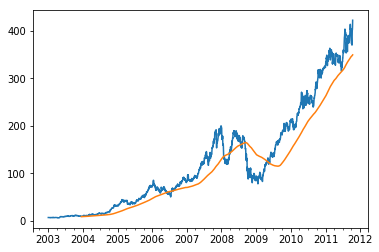

In [157]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

close_px_all = pd.read_csv('examples/stock_px_2.csv', parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]

close_px = close_px_all.resample('B').ffill()

close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot()

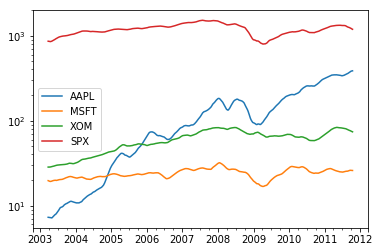

In [158]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()

expanding_mean = appl_std250.expanding().mean()
close_px.rolling(60).mean().plot(logy=True)

In [159]:
close_px.rolling('20D').mean().head()

,AAPL,MSFT,XOM,SPX
2003-01-02,7.400000,21.110000,29.220000,909.030000
2003-01-03,7.425000,21.125000,29.230000,908.810000
2003-01-06,7.433333,21.256667,29.473333,915.543333
2003-01-07,7.432500,21.425000,29.342500,917.390000
2003-01-08,7.402000,21.402000,29.240000,915.898000


### 11.7.1 Exponentially Weighted Functions
<a id='1171'></a>
An alternative to using a static window size with equally weighted observations is ***to specify a constant decay factor to give more weight to more recent observations***. There are a couple of ways to specify the decay factor. A popular one is using a ***span***, which makes the result comparable to a simple moving window function with window size equal to the span.
Since an exponentially weighted statistic places more weight on more recent observations, it “adapts” faster to changes compared with the equal-weighted version.
pandas has the ***ewm*** operator to go along with ***rolling and expanding***. Here’s an example comparing a 60-day moving average of Apple’s stock price with an EW moving average with ***span***=60

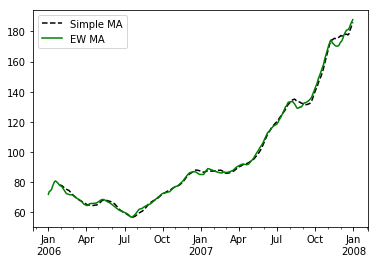

In [162]:
aapl_px = close_px.AAPL['2006':'2007']
ma60 = aapl_px.rolling(30, min_periods=20).mean()

ewma60 = aapl_px.ewm(span=30).mean()
ma60.plot(style='k--', label='Simple MA')
ewma60.plot(style='g-', label='EW MA')
plt.legend()

### 11.7.2 Binary Moving Window Functions
<a id='1172'></a>
Some statistical operators, like correlation and covariance, need to operate on two time series. As an example, financial analysts are often interested in a stock’s correlation to a benchmark index like the S&P 500. To have a look at this, we first compute the percent change for all of our time series of interest:

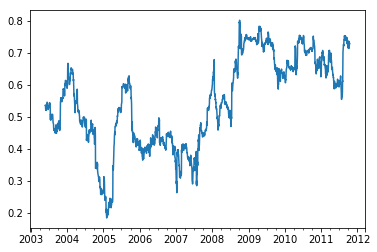

In [164]:
spx_px = close_px_all['SPX']
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()

# The corr aggregation function after we call rolling can then compute the rolling correlation with spx_rets
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

Suppose you wanted to compute the correlation of the S&P 500 index with many stocks at once. Writing a loop and creating a new DataFrame would be easy but might get repetitive, so if you pass a Series and a DataFrame, a function like ***rolling_corr*** will compute the correlation of the Series (spx_rets, in this case) with each column in the DataFrame:

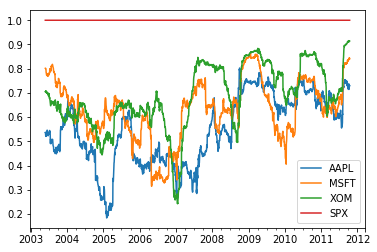

In [166]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

### 11.7.3 User-Defined Moving Window Function
<a id='1173'></a>
The ***apply*** method on ***rolling*** and related methods provides a means to apply an array function of your own devising over a moving window. The only requirement is that the function produce a single value (a reduction) from each piece of the array. For example, while we can compute sample quantiles using ***rolling(...).quantile(q)***, we might be interested in the percentile rank of a particular value over the sample. The ***scipy.stats.percentileofscore*** function does just this

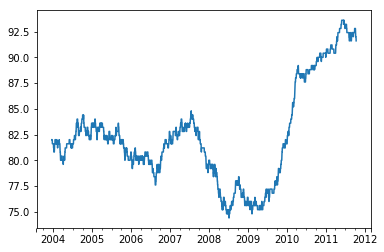

In [168]:
from scipy.stats import percentileofscore

score_at_2percent = lambda x:percentileofscore(x, 0.02)
result = returns.AAPL.rolling(250).apply(score_at_2percent)

result.plot()

<hr>
[Back to top](#index)